In [ ]:
# Primeiro carregue as imagens compactadas no notebook do collab
# Autorize o Collab a acessar seus arquivos no drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os

# Imports para redes neurais
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Imports para processamento de imagem
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
import imageio
import cv2

# Leitura do Dataset e Pré-processamento das Imagens

In [ ]:
imagePath = '/content/drive/MyDrive/dataset/landscape Images/color/'
X = []
Y = []
names = []

i=0
for filename in os.listdir(imagePath):
    i = i + 1

    image = imageio.imread(imagePath+filename)
    # Alterando dimensao da imagem
    image = cv2.resize(image, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
    image = np.array(img_to_array(image), dtype=float)

    # Conversao de espaço de cores para Lab
    # X contem canal L e Y os canais de cor a e b
    varX = rgb2lab(1.0/255*image)[:,:,0]
    varX = varX.reshape(1, 256, 256, 1)
    varY = rgb2lab(1.0/255*image)[:,:,1:]
    varY /= 128
    varY = varY.reshape(1, 256, 256, 2)

    X.append(varX)
    Y.append((varY, filename))

    # Usando 300 imagens inicialmente para evitar longos tempos de execução
    if i >= 300:
        break


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)
y_test, test_filenames = zip(*y_test)
y_train, test_filenames = zip(*y_train)


X_train = np.array(X_train).reshape(len(X_train), 256, 256, 1)
y_train = np.array(y_train).reshape(len(X_train), 256, 256, 2)
X_test = np.array(X_test).reshape(len(X_test), 256, 256, 1)
y_test = np.array(y_test).reshape(len(X_test), 256, 256, 2)

# Definição e treinamento do Modelo de Redes Neurais

In [ ]:
# Definição do Modelo
model = Sequential()
model.add(InputLayer(input_shape=(256, 256, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

model.compile(optimizer='rmsprop',loss='mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 128, 128, 8)       584       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 128, 128, 16)      1168      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 64, 16)        2320      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 64, 64, 32)       

In [ ]:
# Treinamento do Modelo
model.fit(X_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
270/270 [==============================] - 3s 5ms/step - loss: 0.0291
Epoch 2/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0108
Epoch 3/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0105
Epoch 4/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0121
Epoch 5/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0111
Epoch 6/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0101
Epoch 7/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0112
Epoch 8/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0115
Epoch 9/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0117
Epoch 10/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0112
Epoch 11/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0094
Epoch 12/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0107
Epoch 13/50
270/270 [====

In [ ]:
# Avaliação do modelo
model.evaluate(X_test, y_test, batch_size=1)

30/30 [==============================] - 1s 3ms/step - loss: 0.0092


0.00920729897916317

# Colorização das Imagens

In [ ]:
# Colorização
# Logica para salvar imagens de saída no drive
#image_out_path = '/content/drive/MyDrive/dataset/landscape Images/output/'

#for i, image in enumerate(X_test):
#    image_for_test = X_test[i].reshape(1, 256, 256, 1)
#    output = model.predict(image_for_test)
#    output *= 128

    # Junção de Canais de Cor com Luminosidade
#    coloredImage = np.zeros((256, 256, 3))
#    coloredImage[:,:,0] = image_for_test[0][:,:,0]
#    coloredImage[:,:,1:] = output[0]
#    coloredImage = lab2rgb(coloredImage)

#    coloredImage *= 255
    #imageio.imwrite(image_out_path+test_filenames[i], coloredImage)

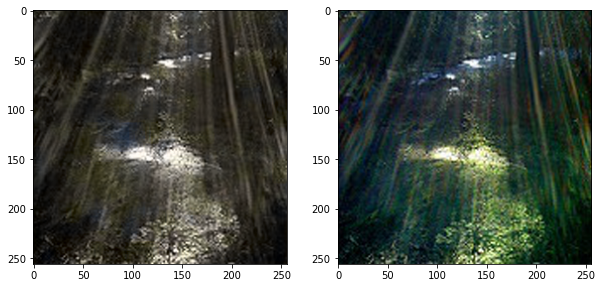

In [ ]:
from matplotlib import pyplot as plt
# Gerando exemplos unitários de saída para observação
i = 8

image_for_test = X_test[i].reshape(1, 256, 256, 1)
output = model.predict(image_for_test)
output *= 128

coloredImage = np.zeros((256, 256, 3))
coloredImage[:,:,0] = image_for_test[0][:,:,0]
coloredImage[:,:,1:] = output[0]
coloredImage = lab2rgb(coloredImage)
coloredImage *= 255
coloredImage = coloredImage.astype(np.uint8)

referenceImage = np.zeros((256, 256, 3))
referenceImage[:,:,0] = X_test[i][:,:,0]
referenceImage[:,:,1:] = y_test[i]*128

referenceImage = lab2rgb(referenceImage)
referenceImage *= 255
referenceImage = referenceImage.astype(np.uint8)

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(coloredImage)
plt.subplot(1,2,2)
plt.imshow(referenceImage)

In [ ]:
# Salvando exemplos unitários
#imageio.imsave('./4p.png', coloredImage)
#imageio.imsave('./4o.png', referenceImage)